In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

import seaborn as sns

sns.set(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.figsize'] = (4.5,2)
rcParams['figure.dpi'] = 100
rcParams['axes.unicode_minus'] = False

,event,timestamp,latency,pub,msg_amount
0,msgLatency,9564791,9.564791,pub500,500
1,msgLatency,3833541,3.833541,pub500,500
2,msgLatency,3223583,3.223583,pub500,500
3,msgLatency,3271833,3.271833,pub500,500
4,msgLatency,1257916,1.257916,pub500,500
...,...,...,...,...,...
187495,msgLatency,328625,0.328625,pub500,1500
187496,msgLatency,570125,0.570125,pub500,1500
187497,msgLatency,622916,0.622916,pub500,1500
187498,msgLatency,503709,0.503709,pub500,1500


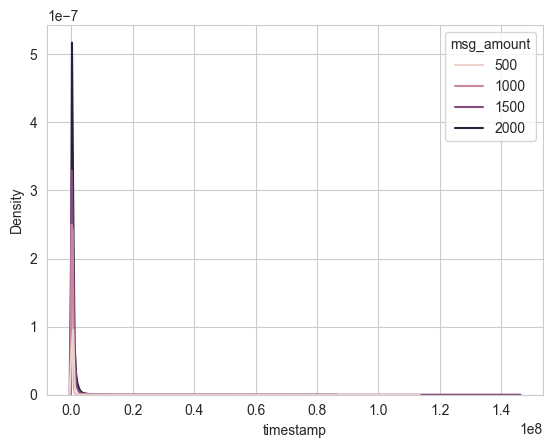

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## msg_100/200/300/400

# file_sets = {
#     "pub500": [],
#     "pub1000": ['./logs/Pub_1000_Msg_25_MI_200_PI_700_BI_1692626374365.csv','./logs/Pub_1000_Msg_50_MI_200_PI_700_BI_1692625131376.csv'],
#     "pub1500": [],
#     "pub2000": ['./logs/Pub_2000_Msg_25_MI_200_PI_700_BI_1692622631048.csv','./logs/Pub_2000_Msg_50_MI_200_PI_700_BI_1692621151666.csv']
# }

file_sets = {
    "pub500": ['./logs/Pub_500_Msg_125_MI_300_PI_500_BI_1692753846516.csv',
               '/Users/minghe/Desktop/large scale/Pub_500_Msg_250_1692285125843.csv',
               './logs/Pub_500_Msg_500_MI_500_PI_500_BI_1692745223512.csv','logs/Pub_500_Msg_375_MI_300_PI_500_BI_1692800698497.csv'
               ],
    # "pub1000": ['./logs/Pub_1000_Msg_125_MI_300_PI_500_BI_1692752459223.csv',
    #             '/Users/minghe/Desktop/large scale/Pub_1000_Msg_250_1692285803327.csv',
    #             './logs/Pub_1000_Msg_500_MI_500_PI_500_BI_1692745758311.csv','logs/Pub_1000_Msg_375_MI_300_PI_500_BI_1692783470879.csv'
    #             ],
    # "pub1500": ['./logs/Pub_1500_Msg_125_MI_300_PI_500_BI_1692751301892.csv','/Users/minghe/Desktop/large scale/Pub_1500_Msg_250_1692286827504.csv','./logs/Pub_1500_Msg_500_MI_500_PI_500_BI_1692747534194.csv','logs/Pub_1500_Msg_375_MI_300_PI_500_BI_1692865557584.csv'],
    #
    # "pub2000": ['./logs/Pub_2000_Msg_125_MI_300_PI_500_BI_1692749252715.csv','/Users/minghe/Desktop/large scale/Pub_2000_Msg_250_1692288668939.csv','logs/Pub_2000_Msg_500_MI_500_PI_500_BI_1692742683369.csv','logs/Pub_2000_Msg_375_MI_300_PI_500_BI_1692779258989.csv']
}


# file_sets = {

#     "pub2000": ['logs/Pub_2000_Msg_125_MI_300_PI_500_BI_1692749251151.csv','/Users/minghe/Desktop/large scale/Pub_2000_Msg_250_1692288667280.csv', './logs/Pub_2000_Msg_500_MI_500_PI_500_BI_1692742676264.csv']
# }

dfs = []

for pub_name, file_paths in file_sets.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        msg_latency_df = df.copy()
        msg_latency_df['latency'] = msg_latency_df['timestamp']/1e6
        msg_latency_df['pub'] = pub_name

        if "Msg_250" in file_path:
            msg_latency_df['msg_amount'] = 1000
        elif "Msg_500" in file_path:
            msg_latency_df['msg_amount'] = 2000
        elif "Msg_375" in file_path:
            msg_latency_df['msg_amount'] = 1500
        elif "Msg_125" in file_path:
            msg_latency_df['msg_amount'] = 500
        else:
            msg_latency_df['msg_amount'] = 0

        dfs.append(msg_latency_df)

merged_df = pd.concat(dfs)

# sns.boxplot(data=merged_df, hue="msg_amount", y="latency", x="pub", showfliers=False )
# plt.xlabel("Message Amount")
# plt.ylabel("Latency(ms)")

sns.kdeplot(data=merged_df, x="timestamp", hue="msg_amount")




# sns.barplot(data=merged_df, x="msg_amount", y="latency", hue="pub")

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
#
# for i, (msg_amount, subset_data) in enumerate(merged_df.groupby('msg_amount')):
#     sns.kdeplot(data=subset_data, x="latency", hue="pub", ax=axes[i],bw_adjust=0.5)
#     # sns.boxplot(data=subset_data, x="pub", y="latency")
#     axes[i].set_title(f"Message Amount: {msg_amount}")
#     axes[i].set_xlim(0,40)

# plt.savefig("msg_latency_compare_#pub_box.pdf")
# has_negative_values = (merged_df['timestamp'] < 0).any()

merged_df

In [48]:
import pandas as pd

# file_path_1='./logs/pub_50/msg_50/metrics-1692117339347.csv'
# file_path_2='./logs/pub_100/msg_50/metrics-1692020850994.csv'
# file_path_3='./logs/pub_150/msg_50/metrics-1692100207239.csv'
# file_path_4='./logs/pub_200/msg_50/metrics-1692100340424.csv'
# file_path_5= './logs/pub_250/msg_50/metrics-1692101053741.csv'
# file_path_6= './logs/pub_300/msg_50/metrics-1692108009237.csv'
#
# files_msg_50 = [file_path_1,file_path_2,file_path_3,file_path_4,file_path_5,file_path_6]

file_path_1='./logs/pub_50/msg_60/metrics-1692099554675.csv'
file_path_2='./logs/pub_100/msg_60/metrics-1692022695542.csv'
file_path_3='./logs/pub_150/msg_60/metrics-1692099428398.csv'
file_path_4='./logs/pub_200/msg_60/metrics-1692099250954.csv'
file_path_5= './logs/pub_250/msg_60/metrics-1692113105703.csv'
file_path_6= './logs/pub_300/msg_60/metrics-1692099626114.csv'

files_msg_60 = [file_path_1,file_path_2,file_path_3,file_path_4,file_path_5,file_path_6]

# file_path_1='./logs/pub_50/msg_40/metrics-1692108293335.csv'
# file_path_2='./logs/pub_100/msg_40/metrics-1692111428760.csv'
# file_path_3='./logs/pub_150/msg_40/metrics-1692108901241.csv'
# file_path_4='./logs/pub_200/msg_40/metrics-1692109488002.csv'
# file_path_5= './logs/pub_250/msg_40/metrics-1692112756247.csv'
# file_path_6= './logs/pub_300/msg_40/metrics-1692111930924.csv'
#
# files_msg_40 = [file_path_1,file_path_2,file_path_3,file_path_4,file_path_5,file_path_6]


dfs = []

for  file_path in files_msg_60:
    df = pd.read_csv(file_path)
    event_name = "Checking Latency is"
    latency_df = df[df['event'] == event_name]
    column_name = file_path.split("/")[-3]  # Extracting the part of the path to use as column name
    # dfs.append(latency_df.get('timestamp'))
    dfs.append(latency_df.get('timestamp').rename(column_name))  # Renaming the column
#
#
merged_df = pd.concat(dfs, axis=1)


output_file = 'latency_msg_60.csv'
merged_df.to_csv(output_file, index=False)


,pub_50,pub_100,pub_150,pub_200,pub_250,pub_300
10,4644834.0,6265000.0,NaN,4966458.0,6133417.0,NaN
15,6271292.0,3451958.0,NaN,7041042.0,10645750.0,NaN
20,6656750.0,7571709.0,NaN,4492083.0,6911042.0,NaN
25,3234416.0,3000417.0,NaN,3884208.0,6732000.0,NaN
30,4503958.0,6736541.0,NaN,3827208.0,5482458.0,NaN
...,...,...,...,...,...,...
1482,NaN,NaN,NaN,NaN,NaN,6931583.0
1487,NaN,NaN,NaN,NaN,NaN,8276250.0
1492,NaN,NaN,NaN,NaN,NaN,8740000.0
1497,NaN,NaN,NaN,NaN,NaN,4955875.0


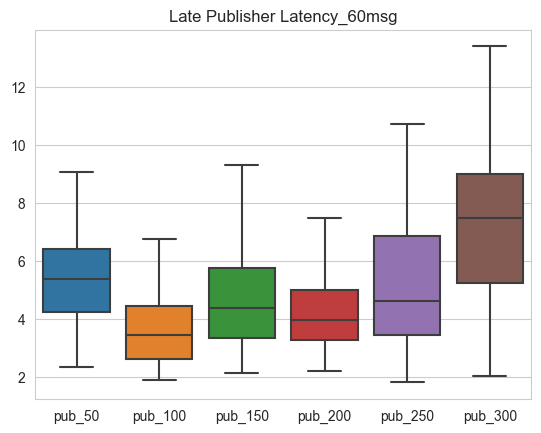

In [53]:
### small scale late publisher latency
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


file_path = './latency_msg_60.csv'
df = pd.read_csv(file_path)

df.reset_index(inplace=True, drop=True)

# plt.figure(figsize=(10, 6))

g = sns.boxplot(data=df/1e6, showfliers=False)
# g=sns.kdeplot(data=df/1e6)
# g = sns.ecdfplot(data=df/1e6)
# sns.displot(data=df/1e6)
# sns.barplot(data=df/1e6)

plt.title('Late Publisher Latency_60msg')
# plt.xlabel('Latency(ms)')
# plt.ylabel('Latency(ms)')

# plt.xlim(0,13)


plt.show()


<Axes: >

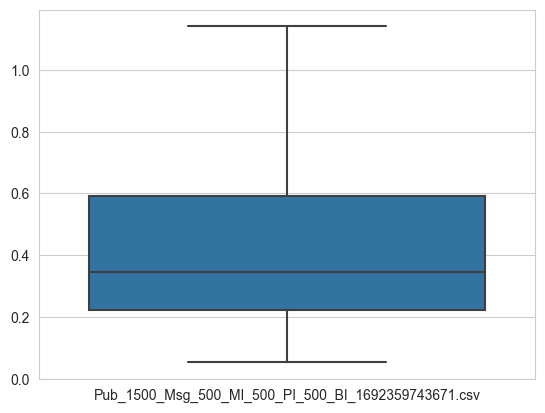

In [32]:
### Late Publishers Latency

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

file_path_1 = './logs/large scale/Pub_1500_Msg_500_MI_500_PI_500_BI_1692359743671.csv'

files_msg_latency = [file_path_1]
# ,file_path_2,file_path_3,file_path_4,file_path_5,file_path_6
dfs = []

for  file_path in files_msg_latency:
    df = pd.read_csv(file_path)
    event_name = "msgLatency"
    latency_df = df[df['event'] == event_name].get('timestamp')
    column_name = file_path.split("/")[-1]
    dfs.append(latency_df.rename(column_name))


merged_df = pd.concat(dfs, axis=1)

sns.boxplot(data=merged_df/1e6, showfliers=False)

# sns.kdeplot(data=merged_df/1e6)
# plt.xlim(0,3)



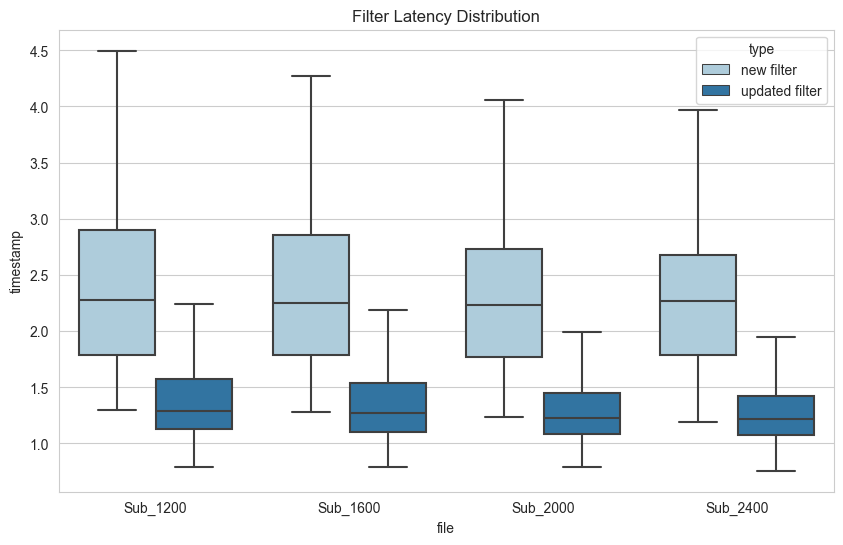

In [12]:
### Filter Latency
### Latency to generate New filter and Update existed filter when new subscriber connected

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# file_path1 = './logs/filter_latency/1200.csv'
# file_path2 = './logs/filter_latency/1600.csv'
# file_path3 = './logs/filter_latency/2000.csv'
# file_path4 = './logs/filter_latency/2400.csv'

file_path1 = './logs/filter_latency/0822_filter_latency/1200.csv'
file_path2 = './logs/filter_latency/0822_filter_latency/1600.csv'
file_path3 = './logs/filter_latency/0822_filter_latency/2000.csv'
file_path4 = './logs/filter_latency/0822_filter_latency/2400.csv'

files_filter_latency = [file_path1,file_path2,file_path3,file_path4]

dfs = []

for file_path in files_filter_latency:
    df = pd.read_csv(file_path)
    df.reset_index(inplace=True, drop=True)
    event_name1 = "Latency to Publish the NEW Threshold is"
    event_name2 = "Latency of Updating Filter is"
    f_new_latency_df = df[df['event'] == event_name1].copy()
    f_new_latency_df['timestamp'] = f_new_latency_df['timestamp'] / 1e6

    f_update_latency_df = df[df['event'] == event_name2].copy()
    f_update_latency_df['timestamp'] = f_update_latency_df['timestamp'] / 1e6

    f_new_latency_df['type'] = 'new filter'
    f_update_latency_df['type'] = 'updated filter'

    f_new_latency_df['file'] ="Sub_"+file_path.split("/")[-1][:-4]
    f_update_latency_df['file'] = "Sub_"+file_path.split("/")[-1][:-4]

    dfs.append(f_new_latency_df)
    dfs.append(f_update_latency_df)

merged_df = pd.concat(dfs, axis=0)

plt.figure(figsize=(10, 6))

# sns.boxplot(data=merged_df, x="file", y="timestamp", hue="type", showfliers=False, palette="Paired")
# plt.savefig("filter_latency_box_0822.pdf")

# sns.kdeplot(data=merged_df[merged_df['type'] == 'new filter'], x="timestamp", hue="file", common_norm=False, fill=False, linewidth=2)
# sns.kdeplot(data=merged_df[merged_df['type'] == 'updated filter'], x="timestamp", hue="file", common_norm=False, fill=False, linestyle=':', linewidth=2)
# plt.xlim(0,5)


plt.title('Filter Latency Distribution')
# plt.savefig("filter_latency_kde_2400.pdf")

subNum = 'Sub_2400'
#
# #
# filtered_data_new = merged_df[(merged_df['file'] == subNum) & (merged_df['type'] == 'new filter')]
# filtered_data_new['timestamp'].describe()

# filtered_data_update = merged_df[(merged_df['file'] == subNum) & (merged_df['type'] == 'updated filter')]
# filtered_data_update['timestamp'].describe()

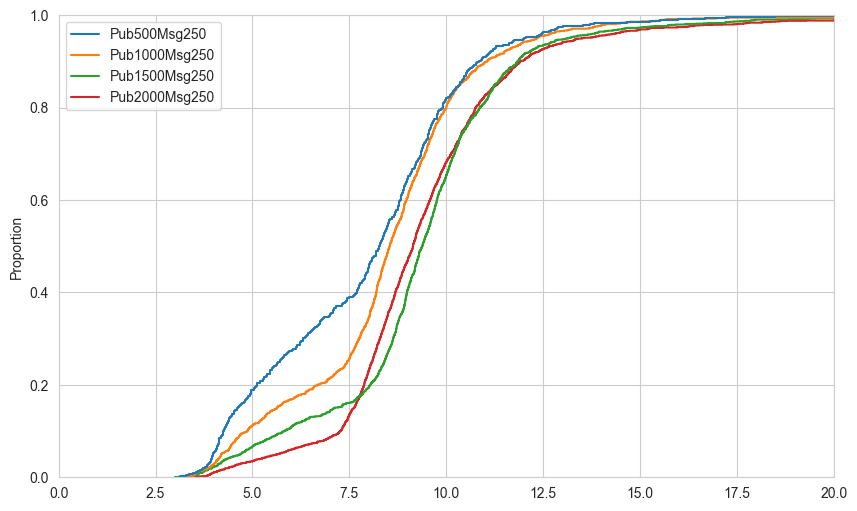

In [3]:

### Late Publisher Latency

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# file_path1 = './logs/Pub_1000_Msg_100_1692279605959.csv'
# file_path2 = './logs/Pub_2000_Msg_100_1692278145325.csv'
# file_path3 = './logs/late_publisher_latency/Pub_3000_Msg_100_1692268764379.csv'

#msg_250*4
file_path1 = './logs/Pub_500_Msg_250_1692285123158.csv'
file_path2 = './logs/Pub_1000_Msg_250_1692285800784.csv'
file_path3 = './logs/Pub_1500_Msg_250_1692286826046.csv'
file_path4 = './logs/Pub_2000_Msg_250_1692288667280.csv'

#msg_500*4
# file_path4 = './logs/Pub_500_Msg_500_MI_500_PI_500_BI_1692362824951.csv'
# file_path5 = './logs/Pub_1000_Msg_500_MI_500_PI_500_BI_1692360993202.csv'
# file_path6 = './logs/Pub_1500_Msg_500_MI_500_PI_500_BI_1692359742549.csv'
# file_path7 = './logs/Pub_2000_Msg_500_MI_500_PI_500_BI_1692358096848.csv'

# file_path5 = './logs/Pub_1000_Msg_500_MI_500_PI_500_BI_1692363725759.csv'
# file_path6 = './logs/Pub_1500_Msg_500_MI_500_PI_500_BI_1692364600547.csv'



files_msg_latency = [file_path1,file_path2, file_path3,file_path4]
# files_msg_latency = [file_path4, file_path5,file_path6, file_path7]
# ,file_path_2,file_path_3,file_path_4,file_path_5,file_path_6
dfs = []

for  file_path in files_msg_latency:
    df = pd.read_csv(file_path)
    event_name = "Checking Latency is"
    latency_df = df[df['event'] == event_name].get('timestamp')
    column_name = file_path.split("/")[-1].split("_")[0]+file_path.split("/")[-1].split("_")[1]+file_path.split("/")[-1].split("_")[2]+file_path.split("/")[-1].split("_")[3]
    dfs.append(latency_df.rename(column_name))


merged_df = pd.concat(dfs, axis=1)
#
plt.figure(figsize=(10, 6))

# sns.boxplot(data=merged_df/1e6, showfliers=False)
# plt.ylabel("Latency(ms)")
# # plt.savefig("late_pub_msg_2000_box.pdf")
# plt.xticks(rotation=-45)

# sns.kdeplot(data=merged_df/1e6)
# plt.xlim(0,25)
# plt.savefig("late_pub_kde_msg_2000.pdf")
# density_values = sns.kdeplot(merged_df/1e6).get_lines()[3].get_data()
# max_density_index = np.argmax(density_values[1])
# max_density_x = density_values[0][max_density_index]
# max_density_y = density_values[1][max_density_index]

# plt.annotate(f'Max Density: ({max_density_x:.2f}, {max_density_y:.2f})',
#              xy=(max_density_x, max_density_y),
#              xytext=(max_density_x + 0.5, max_density_y + 0.05),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              )

g = sns.ecdfplot(data=merged_df/1e6)
plt.xlim(0,20)
plt.savefig("late_pub_ecdf_msg_1000.pdf")





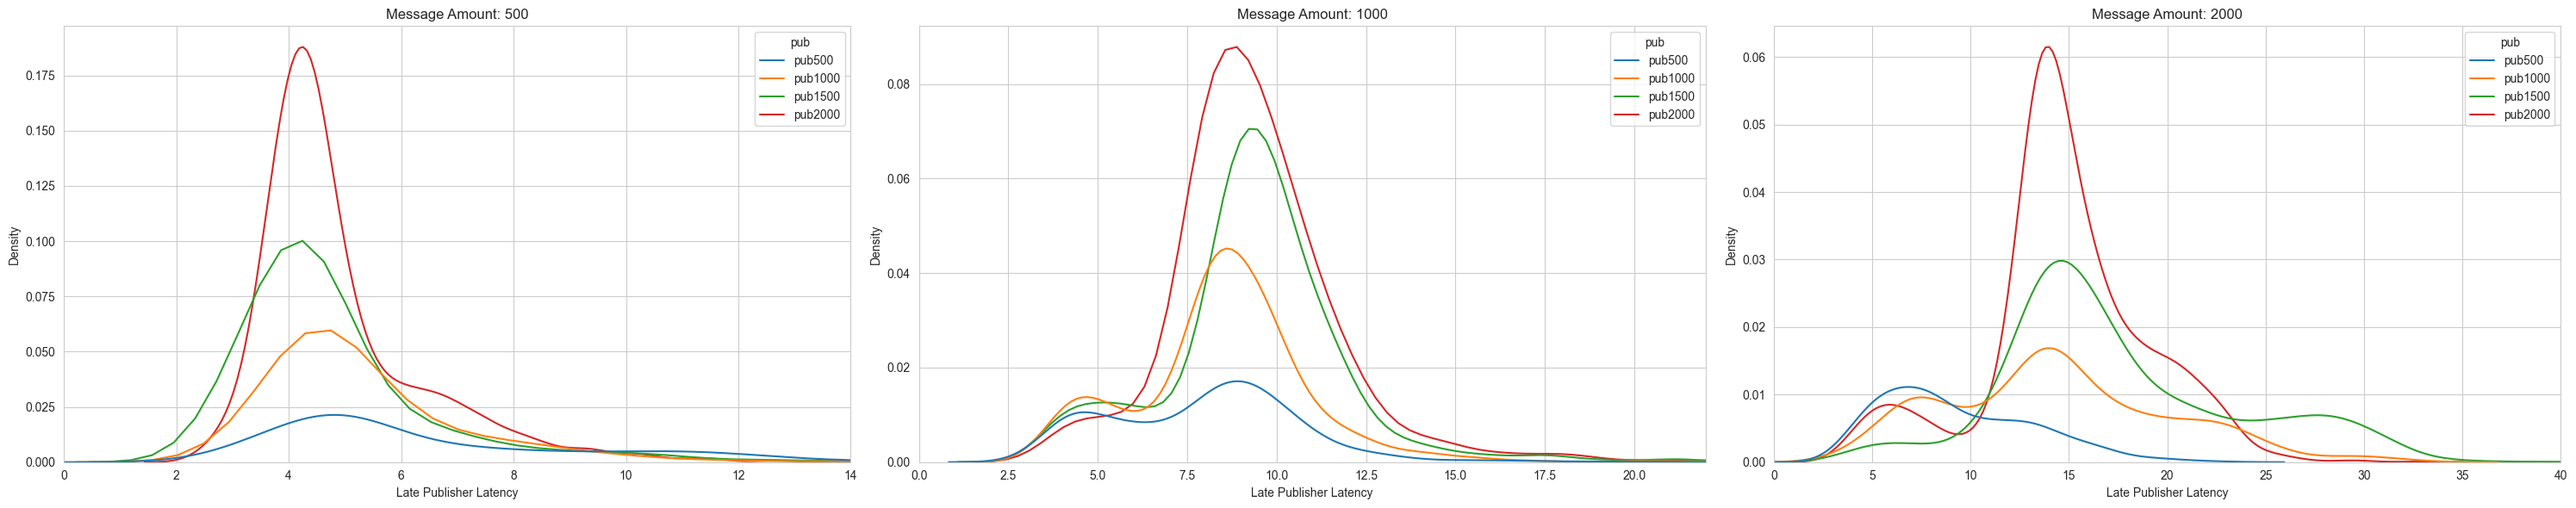

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode


#msg_250*4
# file_path1 = './logs/Pub_500_Msg_250_1692285123158.csv'
# file_path2 = './logs/Pub_1000_Msg_250_1692285800784.csv'
# file_path3 = './logs/Pub_1500_Msg_250_1692286826046.csv'
# file_path4 = './logs/Pub_2000_Msg_250_1692288667280.csv'

# #msg_500*4
# file_path4 = './logs/Pub_500_Msg_500_MI_500_PI_500_BI_1692362824951.csv'
# file_path5 = './logs/Pub_1000_Msg_500_MI_500_PI_500_BI_1692360993202.csv'
# # file_path6 = './logs/Pub_1500_Msg_500_MI_500_PI_500_BI_1692359742549.csv'
# file_path7 = './logs/Pub_2000_Msg_500_MI_500_PI_500_BI_1692358096848.csv'

#
# # file_path5 = './logs/Pub_1000_Msg_500_MI_500_PI_500_BI_1692363725759.csv'
# file_path6 = './logs/Pub_1500_Msg_500_MI_500_PI_500_BI_1692364600547.csv'


##08-21 pub_1000
# file_path5 = './logs/Pub_1000_Msg_500_MI_300_PI_500_BI_1692607013924.csv'


#msg_750*4


# file_sets = {
#     "pub500": ['/Users/minghe/Desktop/large scale/Pub_500_Msg_250_1692285123158.csv','/Users/minghe/Desktop/large scale/Pub_500_Msg_500_MI_500_PI_500_BI_1692362824951.csv'],
#
#     "pub1000": ['/Users/minghe/Desktop/large scale/Pub_1000_Msg_250_1692285800784.csv','/Users/minghe/Desktop/large scale/Pub_1000_Msg_500_MI_500_PI_500_BI_1692363725759.csv'],
#
#     "pub1500": ['/Users/minghe/Desktop/large scale/Pub_1500_Msg_250_1692286826046.csv', '/Users/minghe/Desktop/large scale/Pub_1500_Msg_500_MI_500_PI_500_BI_1692364600547.csv'],
#
#     "pub2000": ['/Users/minghe/Desktop/large scale/Pub_2000_Msg_250_1692288667280.csv', './logs/Pub_2000_Msg_500_MI_500_PI_500_BI_1692742676264.csv']
# }

file_sets = {
    "pub500": ['./logs/Pub_500_Msg_125_MI_300_PI_500_BI_1692753845014.csv','/Users/minghe/Desktop/large scale/Pub_500_Msg_250_1692285123158.csv','./logs/Pub_500_Msg_500_MI_500_PI_500_BI_1692745220710.csv'],

    "pub1000": ['./logs/Pub_1000_Msg_125_MI_300_PI_500_BI_1692752457794.csv','/Users/minghe/Desktop/large scale/Pub_1000_Msg_250_1692285800784.csv','./logs/Pub_1000_Msg_500_MI_500_PI_500_BI_1692745756165.csv'],

    "pub1500": ['./logs/Pub_1500_Msg_125_MI_300_PI_500_BI_1692751300097.csv','/Users/minghe/Desktop/large scale/Pub_1500_Msg_250_1692286826046.csv', './logs/Pub_1500_Msg_500_MI_500_PI_500_BI_1692747532612.csv'],

    "pub2000": ['logs/Pub_2000_Msg_125_MI_300_PI_500_BI_1692749251151.csv','/Users/minghe/Desktop/large scale/Pub_2000_Msg_250_1692288667280.csv', './logs/Pub_2000_Msg_500_MI_500_PI_500_BI_1692742676264.csv']
}


dfs = []

for pub_name, file_paths in file_sets.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        event_name = "Checking Latency is"
        latency_df = df[df['event'] == event_name].copy()
        latency_df['timestamp'] = latency_df['timestamp']/1e6
        latency_df['pub'] = pub_name

        if "Msg_250" in file_path:
            latency_df['msg_amount'] = 1000
        elif "Msg_500" in file_path:
            latency_df['msg_amount'] = 2000
        elif "Msg_125" in file_path:
            latency_df['msg_amount'] = 500
        elif "Msg_800" in file_path:
            latency_df['msg_amount'] = 3200

        else:
             latency_df['msg_amount'] = 0

        dfs.append(latency_df)

merged_df = pd.concat(dfs)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
xlims = {
    500: (0, 14),
    1000: (0, 22),
    1500: (0, 30),
    2000: (0, 40)
}
for i, (msg_amount, subset_data) in enumerate(merged_df.groupby('msg_amount')):
    sns.kdeplot(data=subset_data, x="timestamp", hue="pub", ax=axes[i])
    axes[i].set_title(f"Message Amount: {msg_amount}")
    if msg_amount in xlims:
        axes[i].set_xlim(xlims[msg_amount])
        axes[i].set_xlabel("Late Publisher Latency")




# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 12))  # 2 rows, 2 columns
#
# for i, (msg_amount, subset_data) in enumerate(merged_df.groupby('msg_amount')):
#     row = i // 2
#     col = i % 2
#     ax = axes[row, col]  # Access the correct subplot axis
#
#     sns.kdeplot(data=subset_data, x="timestamp", hue="pub", ax=ax)
#     ax.set_title(f"Message Amount: {msg_amount}")
#     # ax.set_xlim(0, 30)
#     # ax.set_xlabel("Late Publisher Latency")
#
#     if msg_amount in xlims:
#         ax.set_xlim(xlims[msg_amount])  # Set custom x-axis limits
#
#     ax.set_xlabel("Late Publisher Latency")

#

plt.tight_layout()
plt.savefig("latePub_compare_figure_2.pdf")
plt.show()

In [21]:
### Msg Latency

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# file_path1 = './logs/Pub_500_Msg_250_1692285125843.csv'
# file_path2 = './logs/Pub_1000_Msg_250_1692285803327.csv'
# file_path3 = './logs/Pub_1500_Msg_250_1692286827504.csv'
# file_path4 = './logs/Pub_2000_Msg_250_1692288668939.csv'
# files_msg_250_latency = [file_path1,file_path2,file_path3, file_path4]

#
file_path1 = './logs/Pub_500_Msg_500_MI_500_PI_500_BI_1692362826628.csv'
file_path2 = './logs/Pub_1000_Msg_500_MI_500_PI_500_BI_1692360996121.csv'
file_path3 = './logs/Pub_1500_Msg_500_MI_500_PI_500_BI_1692359743671.csv'
file_path4 = './logs/Pub_2000_Msg_500_MI_500_PI_500_BI_1692358099825.csv'
files_msg_500_latency = [file_path1,file_path2,file_path3, file_path4]
# ,file_path_2,file_path_3,file_path_4,file_path_5,file_path_6


dfs = []

for  file_path in files_msg_500_latency:
    df = pd.read_csv(file_path)
    # event_name = "Checking Latency is"
    msg_latency_df = df.get('timestamp')
    column_name = file_path.split("/")[-1].split("_")[0]+file_path.split("/")[-1].split("_")[1]

    dfs.append(msg_latency_df.rename(column_name))

    # dfs.append(msg_latency_df.rename(column_name))
merged_df = pd.concat(dfs, axis=1)
#
sns.boxplot(data=merged_df/1e6, showfliers=False)


# plt.ylabel("Latency(ms)")
# plt.savefig("msg_latency_msg_2000_box.pdf")

# #
# sns.ecdfplot(data=merged_df/1e6)
# plt.xlim(0,2)
# plt.savefig("msg_latency_msg_2000_ecdf.pdf")

#
# sns.kdeplot(data=merged_df/1e6)


FileNotFoundError: [Errno 2] No such file or directory: './logs/Pub_500_Msg_500_MI_500_PI_500_BI_1692362826628.csv'

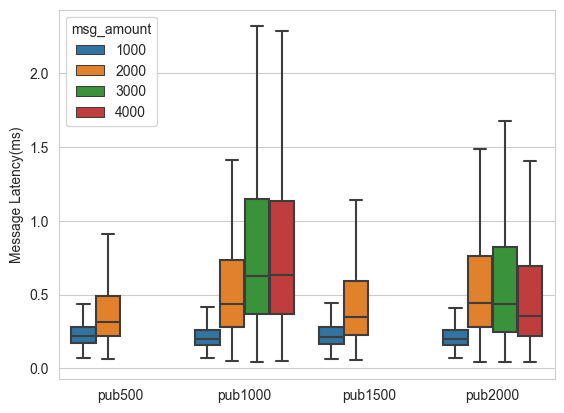

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

file_sets = {
    "pub500": ['./logs/Pub_500_Msg_250_1692285125843.csv', './logs/Pub_500_Msg_500_MI_500_PI_500_BI_1692362826628.csv'],
    "pub1000": ['./logs/Pub_1000_Msg_250_1692285803327.csv', './logs/Pub_1000_Msg_500_MI_300_PI_500_BI_1692607016247.csv','./logs/Pub_1000_Msg_750_MI_300_PI_500_BI_1692609874428.csv', './logs/Pub_1000_Msg_800_MI_300_PI_500_BI_1692612728786.csv'],
    "pub1500": ['./logs/Pub_1500_Msg_250_1692286827504.csv', './logs/Pub_1500_Msg_500_MI_500_PI_500_BI_1692359743671.csv'],
    "pub2000": ['./logs/Pub_2000_Msg_250_1692288668939.csv', './logs/Pub_2000_Msg_500_MI_300_PI_500_BI_1692618204424.csv','./logs/Pub_2000_Msg_750_MI_300_PI_500_BI_1692614948804.csv','./logs/Pub_2000_Msg_800_MI_300_PI_500_BI_1692613610437.csv']
}

dfs = []

for pub_name, file_paths in file_sets.items():
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        msg_latency_df = df.copy()
        msg_latency_df['timestamp'] = msg_latency_df['timestamp']/1e6
        msg_latency_df['pub'] = pub_name
        if "Msg_250" in file_path:
            msg_latency_df['msg_amount'] = 1000
        elif "Msg_500" in file_path:
            msg_latency_df['msg_amount'] = 2000
        elif "Msg_750" in file_path:
            msg_latency_df['msg_amount'] = 3000
        elif "Msg_800" in file_path:
            msg_latency_df['msg_amount'] = 4000
        else:
            msg_latency_df['msg_amount'] = 0

        dfs.append(msg_latency_df)

merged_df = pd.concat(dfs)

sns.boxplot(data=merged_df, x="pub", y="timestamp", hue="msg_amount", showfliers=False)
plt.xlabel("")
plt.ylabel("Message Latency(ms)")
plt.savefig("msg_latency_compare_box.pdf")
